# 머신러닝

# *머신러닝 클래스 구조
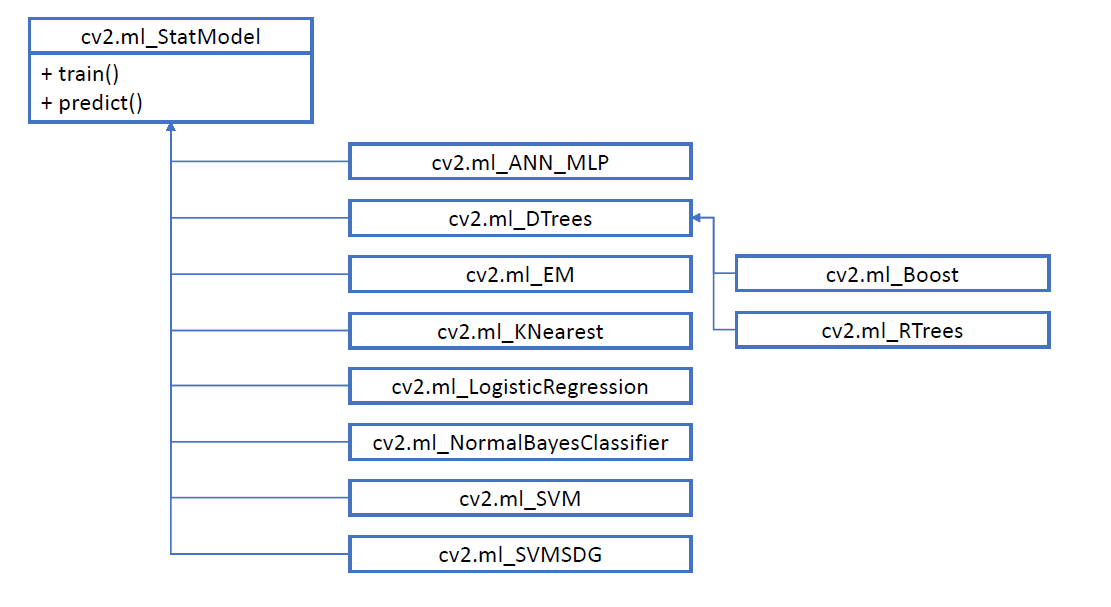

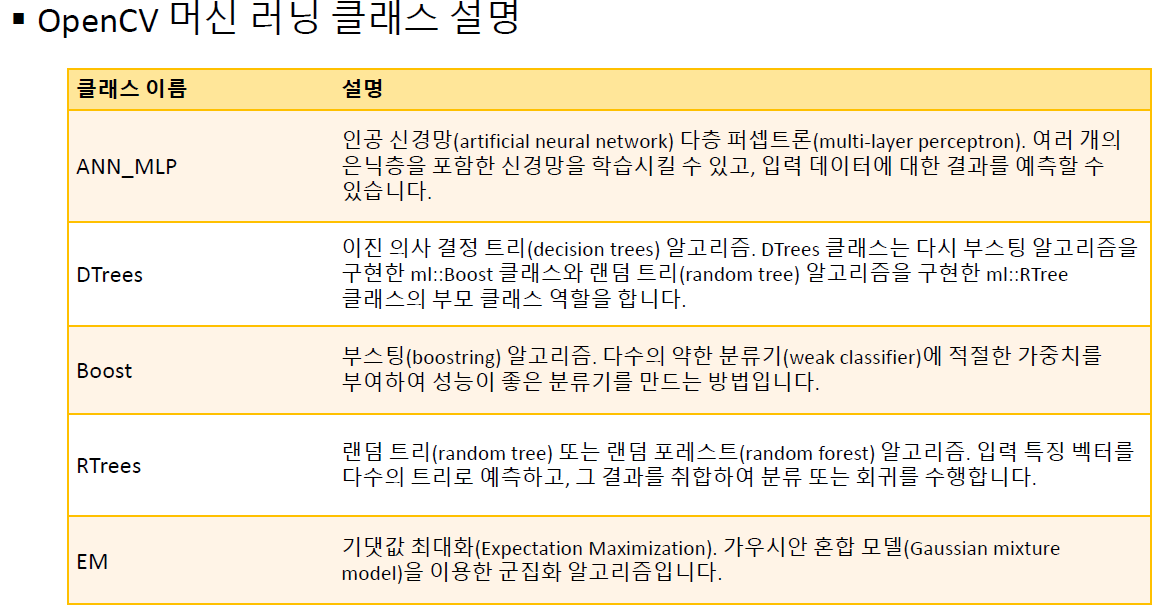

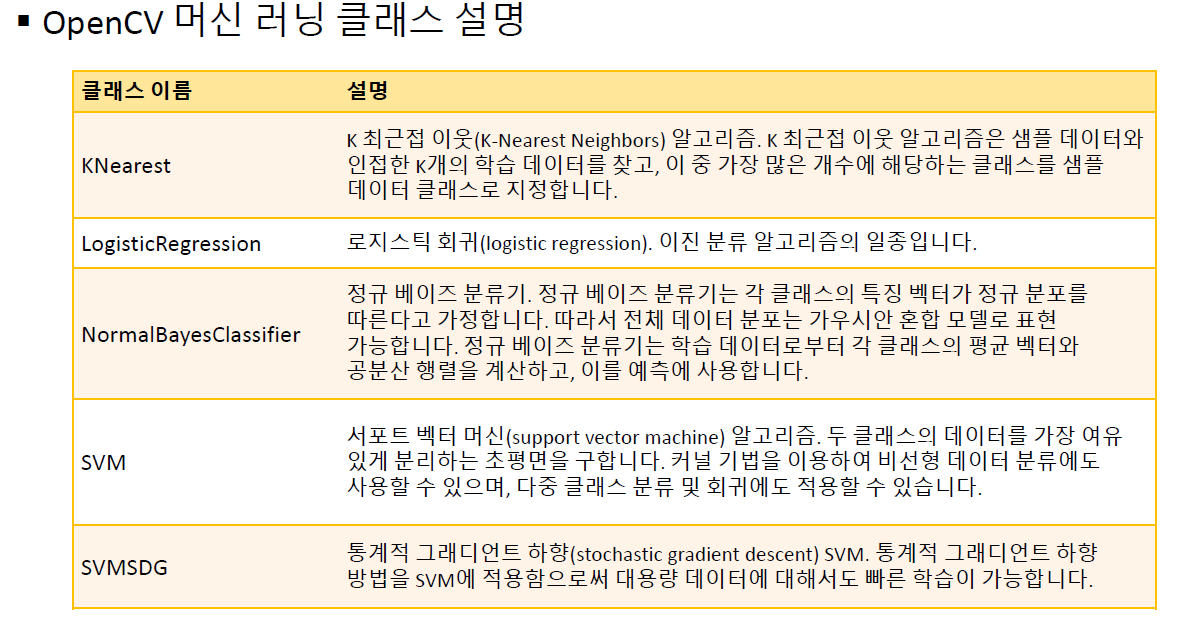

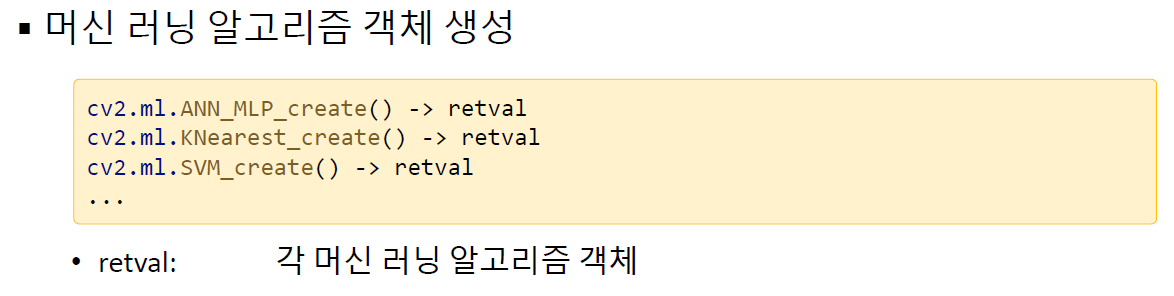

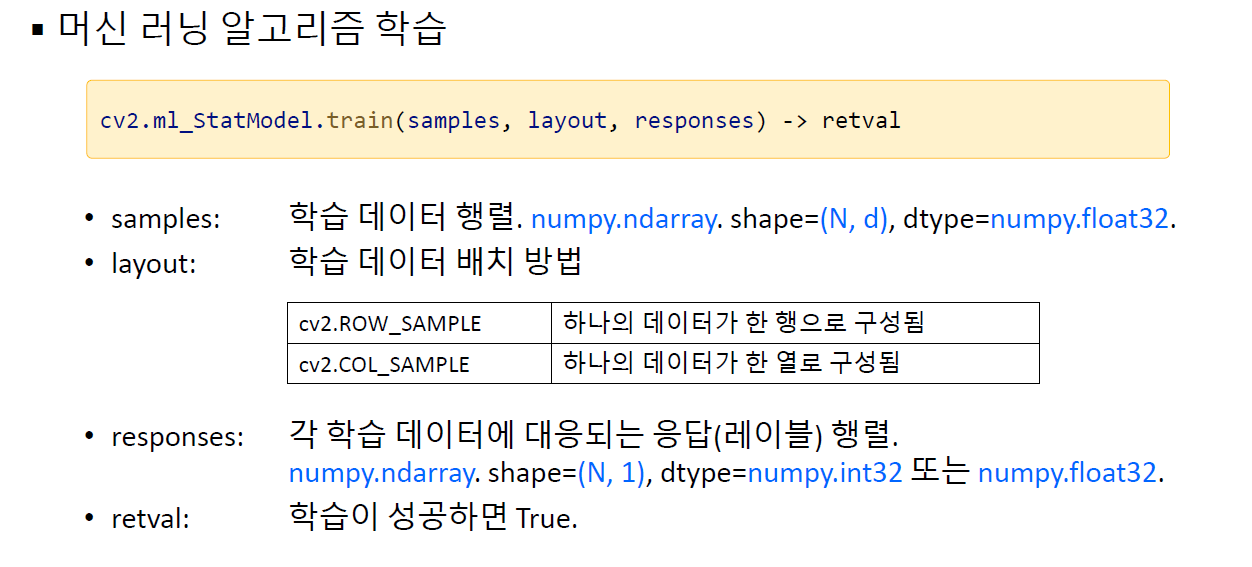

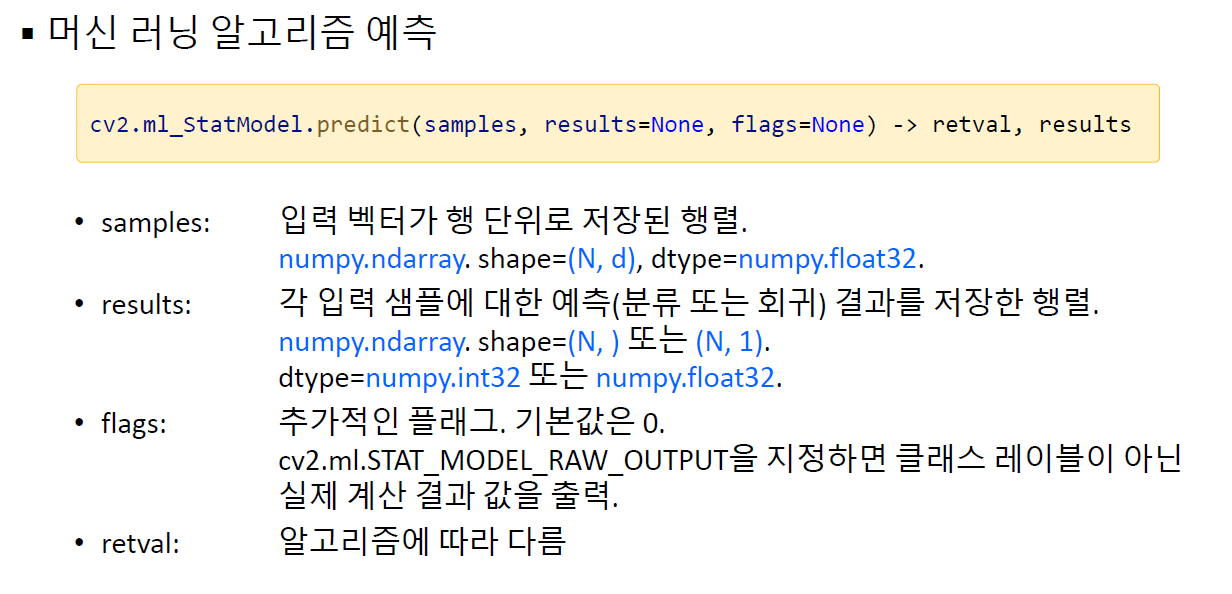

In [3]:
### KNN 1 ###

import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


# 학습 & 레이블 행렬 생성

digits = cv2.imread('digits.png', cv2.IMREAD_GRAYSCALE)

if digits is None:
    print('Image load failed!')
    sys.exit()

h, w = digits.shape[:2]

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
train_images = cells.reshape(-1, 400).astype(np.float32)
train_labels = np.repeat(np.arange(10), len(train_images)/10)

print(train_labels)


### KNN 학습 ###

knn = cv2.ml.KNearest_create()
knn.train(train_images, cv2.ml.ROW_SAMPLE, train_labels)



# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_image = test_image.reshape(-1, 400).astype(np.float32)

        ret, _, _, _ = knn.findNearest(test_image, 5)
        print(int(ret))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


[0 0 0 ... 9 9 9]
2
6
4
1
0
3
1
1
1
1
0
0
1
1
2
8
6
1
7
0


KeyboardInterrupt: 

In [5]:
### KNN 2 ###

import numpy as np
import cv2


def on_k_changed(pos):
    global k_value

    k_value = pos
    if k_value < 1:
        k_value = 1

    trainAndDisplay()


def addPoint(x, y, c):
    train.append([x, y])
    label.append([c])


def trainAndDisplay():
    trainData = np.array(train, dtype=np.float32)
    labelData = np.array(label, dtype=np.int32)

    knn.train(trainData, cv2.ml.ROW_SAMPLE, labelData)

    h, w = img.shape[:2]
    for y in range(h):
        for x in range(w):
            sample = np.array([[x, y]]).astype(np.float32)

            ret, _, _, _ = knn.findNearest(sample, k_value)

            ret = int(ret)
            if ret == 0:
                img[y, x] = (128, 128, 255)
            elif ret == 1:
                img[y, x] = (128, 255, 128)
            elif ret == 2:
                img[y, x] = (255, 128, 128)

    for i in range(len(train)):
        x, y = train[i]
        l = label[i][0]

        if l == 0:
            cv2.circle(img, (x, y), 5, (0, 0, 128), -1, cv2.LINE_AA)
        elif l == 1:
            cv2.circle(img, (x, y), 5, (0, 128, 0), -1, cv2.LINE_AA)
        elif l == 2:
            cv2.circle(img, (x, y), 5, (128, 0, 0), -1, cv2.LINE_AA)

    cv2.imshow('knn', img)


# 학습 데이터 & 레이블
train = []
label = []

k_value = 1
img = np.full((500, 500, 3), 255, np.uint8)
knn = cv2.ml.KNearest_create()

# 랜덤 데이터 생성
NUM = 30
rn = np.zeros((NUM, 2), np.int32)

# (150, 150) 근방의 점은 0번 클래스로 설정
cv2.randn(rn, 0, 50)
for i in range(NUM):
    addPoint(rn[i, 0] + 150, rn[i, 1] + 150, 0)

# (350, 150) 근방의 점은 1번 클래스로 설정
cv2.randn(rn, 0, 50)
for i in range(NUM):
    addPoint(rn[i, 0] + 350, rn[i, 1] + 150, 1)

# (250, 400) 근방의 점은 2번 클래스로 설정
cv2.randn(rn, 0, 70)
for i in range(NUM):
    addPoint(rn[i, 0] + 250, rn[i, 1] + 400, 2)

# 영상 출력 창 생성 & 트랙바 생성
cv2.namedWindow('knn')
cv2.createTrackbar('k_value', 'knn', 1, 5, on_k_changed)

# KNN 결과 출력
trainAndDisplay()

cv2.waitKey()
cv2.destroyAllWindows()


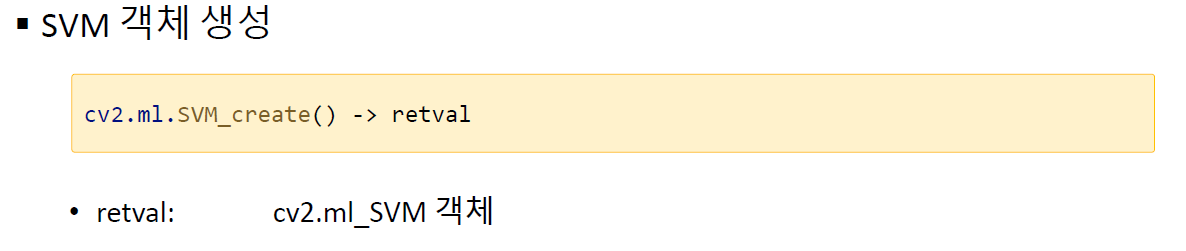

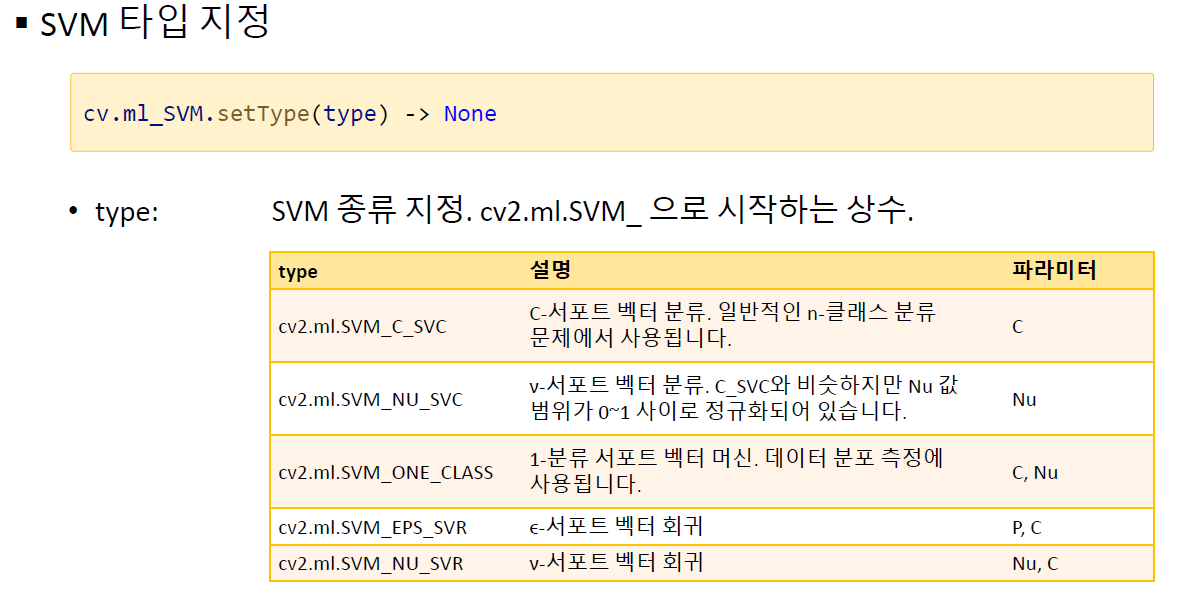

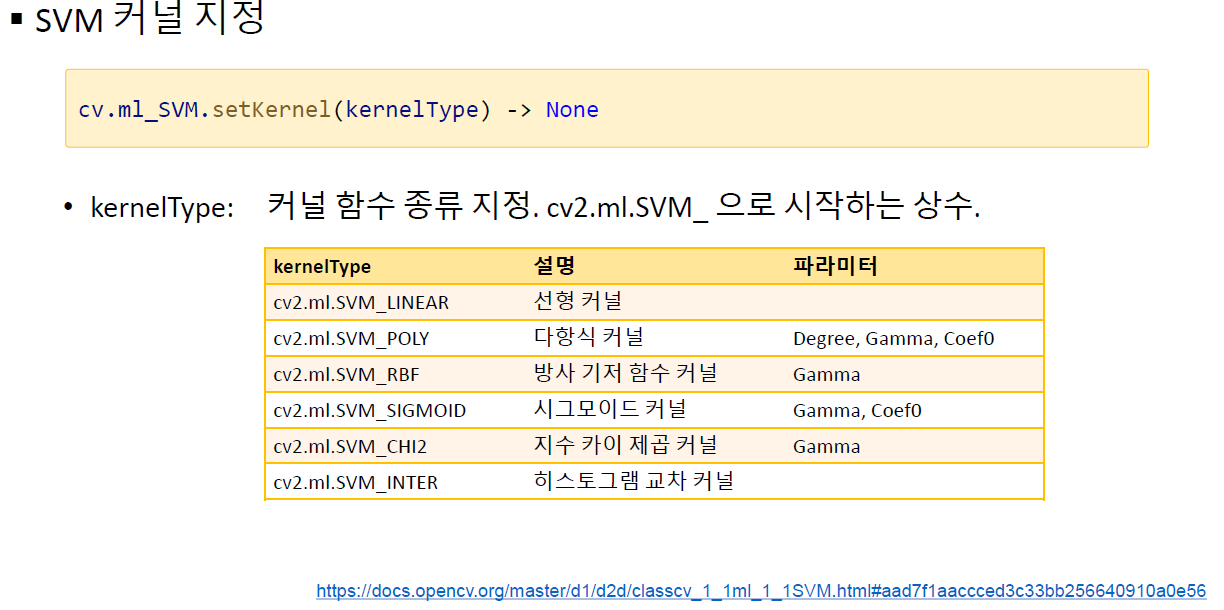

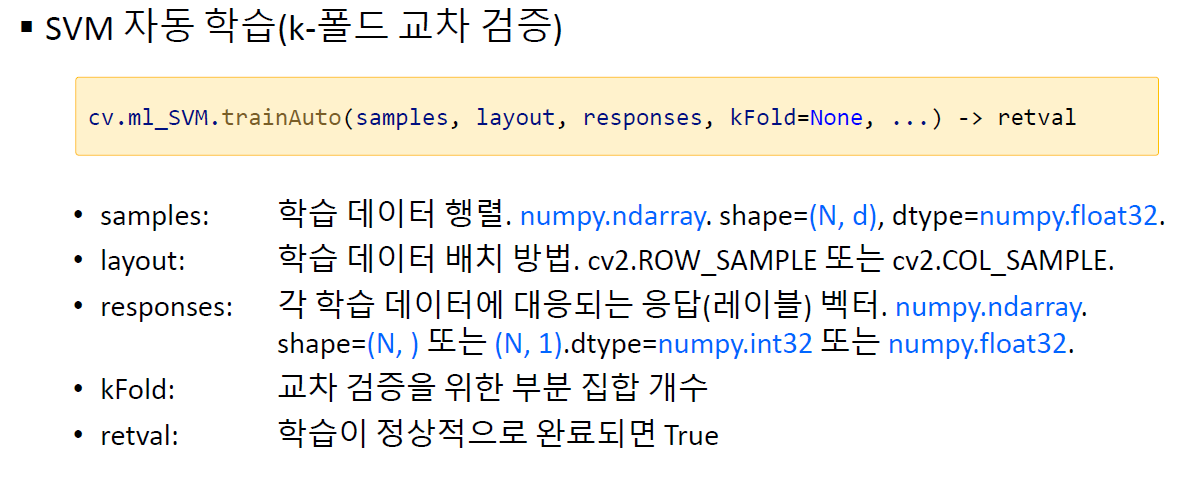

In [8]:
### SVM  ###

import sys
import numpy as np
import cv2


trains = np.array([[150, 200], [200, 250],
                   [100, 250], [150, 300],
                   [350, 100], [400, 200],
                   [400, 300], [350, 400]], dtype=np.float32)
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])


### SVM 설정 ###
svm = cv2.ml.SVM_create()  ## 모델 생성
svm.setType(cv2.ml.SVM_C_SVC)  ## 모델 타입 설정
svm.setKernel(cv2.ml.SVM_LINEAR) ## 모델 커널 설정
#svm.setKernel(cv2.ml.SVM_RBF)

svm.trainAuto(trains, cv2.ml.ROW_SAMPLE, labels) ### svm 모델 자동학습

print('C:', svm.getC())
print('Gamma:', svm.getGamma())

w, h = 500, 500
img = np.zeros((h, w, 3), dtype=np.uint8)

for y in range(h):
    for x in range(w):
        test = np.array([[x, y]], dtype=np.float32)
        _, res = svm.predict(test)
        ret = int(res[0, 0])

        if ret == 0:
            img[y, x] = (128, 128, 255)  # Red
        else:
            img[y, x] = (128, 255, 128)  # Green

color = [(0, 0, 128), (0, 128, 0)]

for i in range(trains.shape[0]):
    x = int(trains[i, 0])
    y = int(trains[i, 1])
    l = labels[i]

    cv2.circle(img, (x, y), 5, color[l], -1, cv2.LINE_AA)

cv2.imshow('svm', img)
cv2.waitKey()
cv2.destroyAllWindows()


C: 0.1
Gamma: 1.0
